In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as mticker
import colorcet as cc

In [12]:
%matplotlib widget 

/tmp/ipykernel_4900/2000074442.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/2000074442.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/2000074442.py:19: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this 

  set_id  method  I_value  r_value
0  Set 1    :ac:      5.5    0.375
1  Set 1  :acsh:      8.8    0.293
2  Set 1    :sh:      7.7    0.335
0  Set 2    :ac:      3.5    0.446
1  Set 2  :acsh:      4.6    0.394
2  Set 2    :sh:      4.3    0.457
0  Set 3    :ac:      5.0    0.393
1  Set 3  :acsh:      8.3    0.293
2  Set 3    :sh:      7.0    0.338
0  Set 4    :ac:      5.0    0.385
1  Set 4  :acsh:      7.6    0.313
2  Set 4    :sh:      6.6    0.366


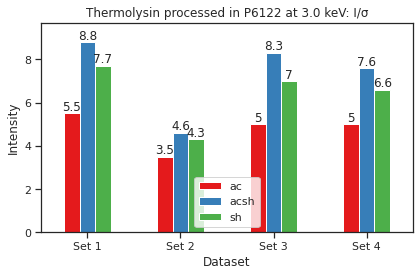

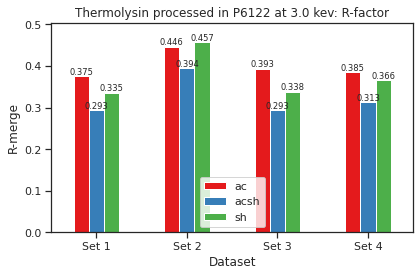

4


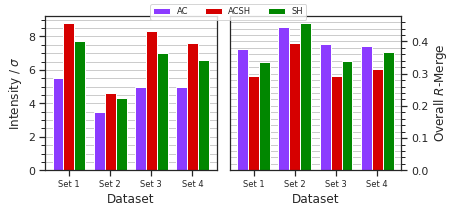

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_10_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_11_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_12_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p0_16_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin processed in P6122 at 3.0 keV: I/σ')#4.133 Å 
ax.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p0_I_over_sigma.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p0_I_over_sigma.png', dpi=300)
plt.show()


sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin processed in P6122 at 3.0 kev: R-factor')# 4.133 Å (3 keV)')
ax2.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fontsize='x-small')
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p0_rmerges.png', dpi=300)
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p0_rmerges.png')
plt.show()



n = len(file_paths)
print(n)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6.5,3))
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks([0,1,2,3])
ax1.set_xticklabels([f"Set {i}" for i in range(1, n+1)], fontsize='x-small')
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Dataset")

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1,2,3])
ax2.set_xticklabels([f"Set {i}" for i in range(1, n+1)], fontsize='x-small')
ax2.set_ylabel("Overall $R$-Merge")
ax2.set_xlabel("Dataset")
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p0_stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p0_stats_grid.pdf')

/tmp/ipykernel_4900/2561463148.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/2561463148.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/2561463148.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this 

  set_id  method  I_value  r_value
0  Set 1    :ac:      3.9    0.397
1  Set 1  :acsh:      5.4    0.345
2  Set 1    :sh:      3.9    0.411
0  Set 2    :ac:      4.2    0.390
1  Set 2  :acsh:      5.6    0.341
2  Set 2    :sh:      4.1    0.407
0  Set 3    :ac:      4.4    0.369
1  Set 3  :acsh:      6.4    0.312
2  Set 3    :sh:      5.6    0.339
0  Set 4    :ac:      3.7    0.435
1  Set 4  :acsh:      4.9    0.390
2  Set 4    :sh:      4.9    0.438
0  Set 5    :ac:      3.6    0.413
1  Set 5  :acsh:      5.3    0.357
2  Set 5    :sh:      3.9    0.394


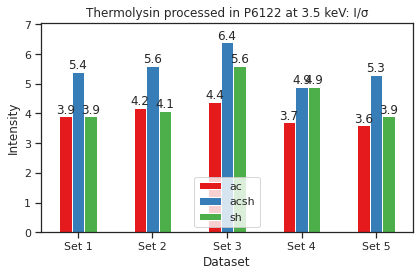

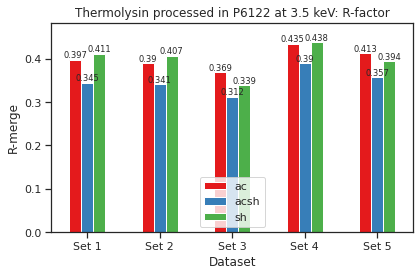

5


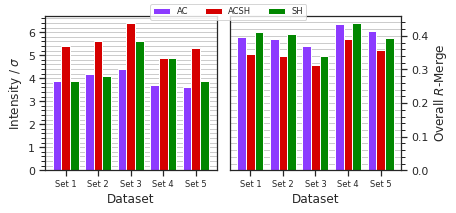

In [7]:
# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_1_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_2_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_3_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_4_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p5_5_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin processed in P6122 at 3.5 keV: I/σ')#3.542 Å
ax.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p5_I_over_sigma.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p5_I_over_sigma.png', dpi=300)
plt.show()

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin processed in P6122 at 3.5 keV: R-factor')#3.542 Å 
ax2.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fontsize='x-small')
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p5_rmerges.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p5_rmerges.png', dpi=300)
plt.show()


n = len(file_paths)
print(n)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6.5,3))
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels([f"Set {i}" for i in range(1, n+1)], fontsize='x-small')
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Dataset")

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1,2,3,4])
ax2.set_xticklabels([f"Set {i}" for i in range(1, n+1)], fontsize='x-small')
ax2.set_ylabel("Overall $R$-Merge")
ax2.set_xlabel("Dataset")
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p5_stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p5_stats_grid.pdf')

In [4]:
def bar_plot(ax, data, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]], total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())
    if legend==False:
        return bars

/tmp/ipykernel_4900/913196115.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/913196115.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/913196115.py:20: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this war

  set_id  method  I_value  r_value
0  Set 1    :ac:      3.8    0.379
1  Set 1  :acsh:      5.4    0.330
2  Set 1    :sh:      3.7    0.390
0  Set 2    :ac:      3.8    0.382
1  Set 2  :acsh:      4.9    0.338
2  Set 2    :sh:      3.6    0.406
0  Set 3    :ac:      4.5    0.356
1  Set 3  :acsh:      6.6    0.306
2  Set 3    :sh:      6.0    0.322
0  Set 4    :ac:      3.6    0.416
1  Set 4  :acsh:      4.6    0.373
2  Set 4    :sh:      4.2    0.526
0  Set 5    :ac:      3.8    0.390
1  Set 5  :acsh:      5.8    0.335
2  Set 5    :sh:      5.0    0.357


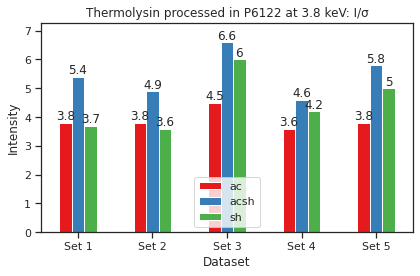

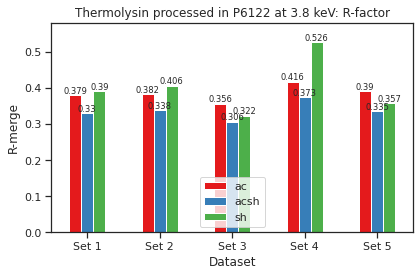

5


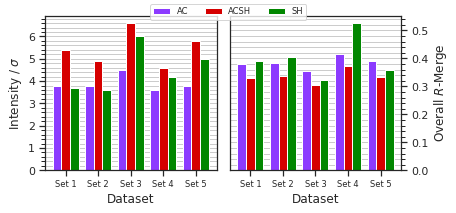

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_1_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_2_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_3_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_4_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/csvs/3p8_5_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    df['set_id'] = f"Set {i}"  # Adding a set identifier
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin processed in P6122 at 3.8 keV: I/σ')#: 3.263 Å
ax.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p8_I_over_sigma.png', dpi=300)
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p8_I_over_sigma.png')
plt.show()


sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(6,4))
plt.title(f'Thermolysin processed in P6122 at 3.8 keV: R-factor')#3.263 Å ()
ax2.legend(loc='lower center')
plt.xlabel('Dataset')
plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container, fontsize='x-small', rotation=0)
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p8_rmerges.png', dpi=300)
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/plots/3p8_rmerges.png')
plt.show()



n = len(file_paths)
print(n)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6.5,3))
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks([0,1,2,3,4])
ax1.set_xticklabels([f"Set {i}" for i in range(1, n+1)], fontsize='x-small')
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Dataset")

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks([0,1,2,3,4])
ax2.set_xticklabels([f"Set {i}" for i in range(1, n+1)], fontsize='x-small')
ax2.set_ylabel("Overall $R$-Merge")
ax2.set_xlabel("Dataset")
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p8_stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/3p8_stats_grid.pdf')

In [ ]:
# P6122 merged

In [9]:
import pdb
import numpy as np

import json
import os
import re
import csv

anacor_path = "/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dials_for_anacor"
dials_path = "/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/just_dials"
#csv_path = f"{input('Path to csv file in crystal directory: ')}"
#dataset = dataset_path.split("/")
#dataset = dataset[-1]
dataset = 'merged'

data_list = []
for dir_path in os.listdir(anacor_path):
    if os.path.isdir(os.path.join(anacor_path, dir_path)) is True:
        data_list.append(dir_path)
#data_list = ['3p0', '3p5', 3p8]
print(data_list)
dataset_list = sorted(data_list)

I_list = []
rmerge_list = []

for dir in (dataset_list):

    I_and_rmerge = []

    for target in ['ac','acsh', 'sh']:
        
        i = dataset_list.index(dir)
        if target == 'ac' or target == 'acsh':
            target_path = os.path.join(anacor_path, dir, f'{target}_log.log')
            print(target_path)
        elif target == 'sh':
            target_path = os.path.join(dials_path, dir, 'merged.log')
            print(target_path)

        if os.path.exists(target_path):
            print(f'{dir} {target} log  exists')
            with open(target_path, 'r') as file:
                lines = file.readlines()
        else:
            print(f'{dir} {target} log does not exist')
            break

        # Find the start and end indices of the table
        start_index = None
        end_index = None
        for i, line in enumerate(lines):
            if '-------------Summary of merging statistics--------------' in line:
                start_index = i + 2#1
                
            elif 'Writing html report to ' in line:
                end_index = i - 1

        for line in lines[start_index:end_index]:
            # Remove leading/trailing whitespaces and split the line into columns
            columns = line.strip().split()

            # Convert the columns to floats
            row_data = [col for col in columns]
            if row_data[0] == 'I/sigma':
                #I_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'\n{dir.replace("p",".")} :{target}: {float(row_data[1])} ')
            if row_data[0] == 'Rmerge(I)':
                #rmerge_list.append(f'\n{dir} :{target}: {float(row_data[1])}')
                I_and_rmerge.append(f'{float(row_data[1])}')

    dataset_filename = f'/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/{dir}_I_and_r_merge.csv'#.format(target)
    with open(dataset_filename, 'w') as dataset_file:
        writer = csv.writer(dataset_file, delimiter=' ', escapechar=' ', quoting=csv.QUOTE_NONE)
        writer.writerow(I_and_rmerge)
    dataset_file.close()

['3p8', '3p0', '3p5']
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dials_for_anacor/3p0/ac_log.log
3p0 ac log  exists
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dials_for_anacor/3p0/acsh_log.log
3p0 acsh log  exists
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/just_dials/3p0/merged.log
3p0 sh log  exists
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dials_for_anacor/3p5/ac_log.log
3p5 ac log  exists
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dials_for_anacor/3p5/acsh_log.log
3p5 acsh log  exists
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/just_dials/3p5/merged.log
3p5 sh log  exists
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dials_for_anacor/3p8/ac_log.log
3p8 ac log  exists
/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/dials_for_anacor/3p8/acsh_log.log
3p8 acsh log  e

/tmp/ipykernel_4900/768373886.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/768373886.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_4900/768373886.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this war

   set_id  method  I_value  r_value
0     3.0    :ac:      9.4    0.414
1     3.0  :acsh:     13.1    0.362
2     3.0    :sh:     21.9    0.193
0     3.5    :ac:      8.4    0.408
1     3.5  :acsh:     10.9    0.369
2     3.5    :sh:      8.7    0.402
0     3.8    :ac:      8.4    0.393
1     3.8  :acsh:     11.1    0.350
2     3.8    :sh:      9.1    0.378


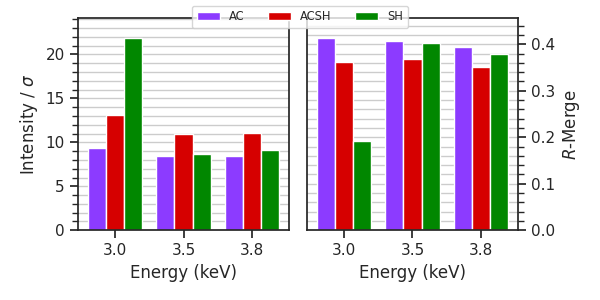

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p0_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P6122/merged_data/csvs/3p8_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']


n = len(file_paths)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(6,3))
data1 = {'AC':ac['I_value'].to_list(), 'ACSH':acsh['I_value'].to_list(), 'SH':sh['I_value'].to_list()}
bars = bar_plot(ax1, data1, legend=False, colors=[cc.glasbey[1], cc.glasbey[0], cc.glasbey[2]])
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1.6,1.15))
ax1.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax1.set_xticks(list(np.arange(n)))
#ax1.set_xticklabels([list(ac['set_id'])[i].replace(to_replace='_', value=': ') for i in range(n)])
ax1.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax1.set_ylabel("Intensity / $\sigma$")
ax1.set_xlabel("Energy (keV)")
lim = ax1.get_ylim()
ax1.set_ylim(lim[0], lim[1]*1.05)

data2 = {'AC':ac['r_value'].to_list(), 'ACSH':acsh['r_value'].to_list(), 'SH':sh['r_value'].to_list()}
bars2 = bar_plot(ax2, data2, legend=False)
#ax1.legend(bars, data1.keys(), ncols=3, fontsize='x-small', bbox_to_anchor=(1,1.15))
ax2.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax2.set_xticks(list(np.arange(n)))
ax2.set_xticklabels([list(ac['set_id'])[i] for i in range(n)])
ax2.set_ylabel("$R$-Merge")
ax2.set_xlabel("Energy (keV)")
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
ax2.yaxis.set_ticks_position('right')
ax2.yaxis.set_label_position('right')
fig.legend(bars, data1.keys(), ncols=3, fontsize='x-small', loc='upper center')
fig.tight_layout()
#plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_2_P1/stats.pdf')
ax1.grid(axis='y', which='both')
ax2.grid(axis='y', which='both')
fig.tight_layout()
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P6122/merged_stats.pdf')

/tmp/ipykernel_16857/291081517.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_16857/291081517.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
/tmp/ipykernel_16857/291081517.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this 

   set_id  method  I_value  r_value
0     3.0    :ac:      9.0    0.319
1     3.0  :acsh:     14.4    0.265
2     3.0    :sh:     13.9    0.295
0     3.5    :ac:      7.2    0.329
1     3.5  :acsh:      9.4    0.282
2     3.5    :sh:      9.2    0.294
0     3.8    :ac:      6.5    0.308
1     3.8  :acsh:      8.2    0.267
2     3.8    :sh:      8.0    0.274


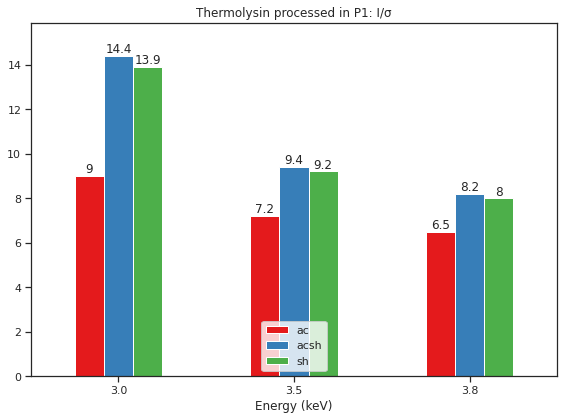

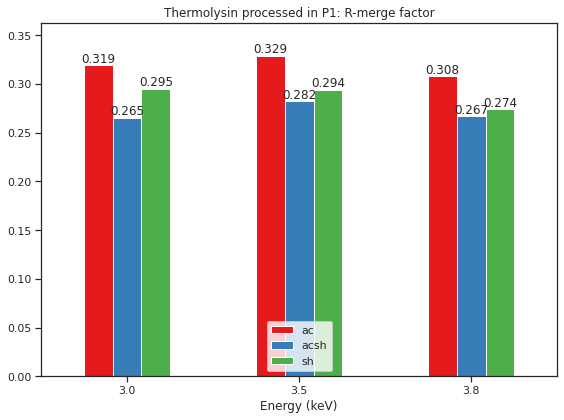

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Put the path to your data files here
file_paths = [
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P1/3p0_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P1/3p5_I_and_r_merge.csv',
    '/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P1/3p8_I_and_r_merge.csv'
]

# Read and concatenate all datasets, adding a 'set_id' to distinguish them
all_data = []
methods = ['method:acsh:', 'method:sh:', 'method:ac:']

for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path, names=['set_id', 'method', 'I_value', 'r_value'], skiprows=0, sep=('  '))
    #df['set_id'] = f"Set {i}"  # Adding a set identifier
    df['set_id'] = df['set_id'].replace(to_replace='_', value=': ')
    all_data.append(df)

# Concatenating all the dataframes
combined_data = pd.concat(all_data)
print(combined_data)

ac = combined_data[combined_data['method']==':ac:']
acsh = combined_data[combined_data['method']==':acsh:']
sh = combined_data[combined_data['method']==':sh:']

sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax = pd.DataFrame({'ac':list(ac['I_value']), 'acsh':list(acsh['I_value']), 'sh':list(sh['I_value'])}, index=list(ac['set_id']))
ax = ax.plot(kind='bar', legend=True, figsize=(8,6))
ax.legend(loc='lower center')
plt.title(f'Thermolysin processed in P1: I/σ')
plt.xlabel('Energy (keV)')
#plt.ylabel('Intensity')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)
lim = ax.get_ylim()
ax.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P1/merged_data/I_over_sigma.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P1/I_over_sigma.png', dpi=300)
plt.show()


sns.set_style("darkgrid")
sns.set(palette='Set1', style='ticks')
ax2 = pd.DataFrame({'ac':list(ac['r_value']), 'acsh':list(acsh['r_value']), 'sh':list(sh['r_value'])}, index=list(ac['set_id']))
ax2 = ax2.plot(kind='bar', legend=True, figsize=(8,6))
ax2.legend(loc='lower center')
plt.title(f'Thermolysin processed in P1: R-merge factor')
plt.xlabel('Energy (keV)')
#plt.ylabel('R-merge')
plt.xticks(rotation=0)
for container in ax2.containers:
    ax2.bar_label(container)
lim = ax2.get_ylim()
ax2.set_ylim(lim[0], lim[1]*1.05)
plt.tight_layout()
plt.savefig('/dls/i23/data/2024/cm37273-1/processing/tihana/tlys_9/P1/merged_data/rmerges.png')
plt.savefig('/home/icf19162/CP5-Thesis/plots/exp1/tlys_9_P1/rmerges.png', dpi=300)
plt.show()